# Importing Data & Simple Edits

In [1]:
import psycopg2
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score, roc_auc_score

In [2]:
params = {
    "host": "localhost",
    "user": "postgres",
    "port": 5432,
    "password": "336991" 
}
connection = psycopg2.connect(**params, dbname= "istdsa")

In [3]:
train = pd.read_sql("select * from project03_1.train;", connection)
train

/var/folders/6z/81ycht5s235dy_6ymmclw8p00000gn/T/ipykernel_31114/713853956.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  train = pd.read_sql("select * from project03_1.train;", connection)


quality  fixed acidity  volatile acidity  citric acid  residual sugar  \
0           0            7.4              0.70         0.00             1.9   
1           0            7.8              0.88         0.00             2.6   
2           0            7.8              0.76         0.04             2.3   
3           1           11.2              0.28         0.56             1.9   
4           0            7.4              0.70         0.00             1.9   
...       ...            ...               ...          ...             ...   
1061        1            9.1              0.40         0.50             1.8   
1062        1            8.0              0.38         0.44             1.9   
1063        1           10.2              0.29         0.65             2.4   
1064        1            8.2              0.74         0.09             2.0   
1065        1            7.7              0.61         0.18             2.4   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    ph  \
0         0.076                 11.0                  34.0  0.99780  3.51   
1         0.098                 25.0                  67.0  0.99680  3.20   
2         0.092                 15.0                  54.0  0.99700  3.26   
3         0.075                 17.0                  60.0  0.99800  3.16   
4         0.076                 11.0                  34.0  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
1061      0.071                  7.0                  16.0  0.99462  3.21   
1062      0.098                  6.0                  15.0  0.99560  3.30   
1063      0.075                  6.0                  17.0  0.99565  3.22   
1064      0.067                  5.0                  10.0  0.99418  3.28   
1065      0.083                  6.0                  20.0  0.99630  3.29   

      sulphates  alcohol  
0          0.56      9.4  
1          0.68      9.8  
2          0.65      9.8  
3          0.58      9.8  
4          0.56      9.4  
...         ...      ...  
1061       0.69     12.5  
1062       0.64     11.4  
1063       0.63     11.8  
1064       0.57     11.8  
1065       0.60     10.2  

[1066 rows x 12 columns]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               1066 non-null   int64  
 1   fixed acidity         1066 non-null   float64
 2   volatile acidity      1066 non-null   float64
 3   citric acid           1066 non-null   float64
 4   residual sugar        1066 non-null   float64
 5   chlorides             1066 non-null   float64
 6   free sulfur dioxide   1066 non-null   float64
 7   total sulfur dioxide  1066 non-null   float64
 8   density               1066 non-null   float64
 9   ph                    1066 non-null   float64
 10  sulphates             1066 non-null   float64
 11  alcohol               1066 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 100.1 KB


In [5]:
train.columns

Index(['quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'ph', 'sulphates', 'alcohol'],
      dtype='object')

In [6]:
train.rename(
    columns={"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
             "citric acid": "citric_acid", "residual sugar": "residual_sugar",
             "free sulfur dioxide": "free_sulfur_dioxide", "total sulfur dioxide": "total_sulfur_dioxide"},
            inplace=True)

In [7]:
train.quality.value_counts(normalize=True)

# Target: quality
# Low quality: 0
# High quality: 1

1    0.513133
0    0.486867
Name: quality, dtype: float64

In [8]:
train

quality  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0           0            7.4              0.70         0.00             1.9   
1           0            7.8              0.88         0.00             2.6   
2           0            7.8              0.76         0.04             2.3   
3           1           11.2              0.28         0.56             1.9   
4           0            7.4              0.70         0.00             1.9   
...       ...            ...               ...          ...             ...   
1061        1            9.1              0.40         0.50             1.8   
1062        1            8.0              0.38         0.44             1.9   
1063        1           10.2              0.29         0.65             2.4   
1064        1            8.2              0.74         0.09             2.0   
1065        1            7.7              0.61         0.18             2.4   

      chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    ph  \
0         0.076                 11.0                  34.0  0.99780  3.51   
1         0.098                 25.0                  67.0  0.99680  3.20   
2         0.092                 15.0                  54.0  0.99700  3.26   
3         0.075                 17.0                  60.0  0.99800  3.16   
4         0.076                 11.0                  34.0  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
1061      0.071                  7.0                  16.0  0.99462  3.21   
1062      0.098                  6.0                  15.0  0.99560  3.30   
1063      0.075                  6.0                  17.0  0.99565  3.22   
1064      0.067                  5.0                  10.0  0.99418  3.28   
1065      0.083                  6.0                  20.0  0.99630  3.29   

      sulphates  alcohol  
0          0.56      9.4  
1          0.68      9.8  
2          0.65      9.8  
3          0.58      9.8  
4          0.56      9.4  
...         ...      ...  
1061       0.69     12.5  
1062       0.64     11.4  
1063       0.63     11.8  
1064       0.57     11.8  
1065       0.60     10.2  

[1066 rows x 12 columns]

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               1066 non-null   int64  
 1   fixed_acidity         1066 non-null   float64
 2   volatile_acidity      1066 non-null   float64
 3   citric_acid           1066 non-null   float64
 4   residual_sugar        1066 non-null   float64
 5   chlorides             1066 non-null   float64
 6   free_sulfur_dioxide   1066 non-null   float64
 7   total_sulfur_dioxide  1066 non-null   float64
 8   density               1066 non-null   float64
 9   ph                    1066 non-null   float64
 10  sulphates             1066 non-null   float64
 11  alcohol               1066 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 100.1 KB


In [10]:
train.describe()

quality  fixed_acidity  volatile_acidity  citric_acid  \
count  1066.000000    1066.000000       1066.000000  1066.000000   
mean      0.513133       8.703002          0.525586     0.293546   
std       0.500062       1.807021          0.179127     0.199347   
min       0.000000       4.600000          0.120000     0.000000   
25%       0.000000       7.400000          0.390000     0.120000   
50%       1.000000       8.300000          0.510000     0.280000   
75%       1.000000       9.800000          0.630000     0.470000   
max       1.000000      15.900000          1.330000     1.000000   

       residual_sugar    chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
count     1066.000000  1066.000000          1066.000000           1066.000000   
mean         2.564540     0.090158            15.128518             47.350844   
std          1.234688     0.049575             9.980634             32.994932   
min          0.900000     0.012000             1.000000              6.000000   
25%          1.900000     0.072000             7.000000             22.250000   
50%          2.300000     0.081000            12.000000             38.000000   
75%          2.700000     0.093000            21.000000             63.000000   
max         15.500000     0.611000            68.000000            165.000000   

           density           ph    sulphates      alcohol  
count  1066.000000  1066.000000  1066.000000  1066.000000  
mean      0.997243     3.297908     0.666857    10.295685  
std       0.001822     0.156420     0.180799     1.057493  
min       0.990070     2.740000     0.330000     8.400000  
25%       0.996200     3.190000     0.560000     9.500000  
50%       0.997200     3.300000     0.620000    10.000000  
75%       0.998240     3.390000     0.730000    10.900000  
max       1.003200     3.900000     2.000000    14.900000

In [11]:
test = pd.read_sql("select * from project03_1.test;", connection)
test

/var/folders/6z/81ycht5s235dy_6ymmclw8p00000gn/T/ipykernel_31114/2110418192.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  test = pd.read_sql("select * from project03_1.test;", connection)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              6.6             0.520         0.08             2.4      0.070   
1             11.1             0.310         0.53             2.2      0.060   
2             11.1             0.310         0.53             2.2      0.060   
3              8.0             0.620         0.35             2.8      0.086   
4              9.3             0.330         0.45             1.5      0.057   
..             ...               ...          ...             ...        ...   
528            6.2             0.600         0.08             2.0      0.090   
529            5.9             0.550         0.10             2.2      0.062   
530            6.3             0.510         0.13             2.3      0.076   
531            5.9             0.645         0.12             2.0      0.075   
532            6.0             0.310         0.47             3.6      0.067   

     free sulfur dioxide  total sulfur dioxide  density    ph  sulphates  \
0                   13.0                  26.0  0.99358  3.40       0.72   
1                    3.0                  10.0  0.99572  3.02       0.83   
2                    3.0                  10.0  0.99572  3.02       0.83   
3                   28.0                  52.0  0.99700  3.31       0.62   
4                   19.0                  37.0  0.99498  3.18       0.89   
..                   ...                   ...      ...   ...        ...   
528                 32.0                  44.0  0.99490  3.45       0.58   
529                 39.0                  51.0  0.99512  3.52       0.76   
530                 29.0                  40.0  0.99574  3.42       0.75   
531                 32.0                  44.0  0.99547  3.57       0.71   
532                 18.0                  42.0  0.99549  3.39       0.66   

     alcohol  
0       12.5  
1       10.9  
2       10.9  
3       10.8  
4       11.1  
..       ...  
528     10.5  
529     11.2  
530     11.0  
531     10.2  
532     11.0  

[533 rows x 11 columns]

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         533 non-null    float64
 1   volatile acidity      533 non-null    float64
 2   citric acid           533 non-null    float64
 3   residual sugar        533 non-null    float64
 4   chlorides             533 non-null    float64
 5   free sulfur dioxide   533 non-null    float64
 6   total sulfur dioxide  533 non-null    float64
 7   density               533 non-null    float64
 8   ph                    533 non-null    float64
 9   sulphates             533 non-null    float64
 10  alcohol               533 non-null    float64
dtypes: float64(11)
memory usage: 45.9 KB


In [13]:
test.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'ph', 'sulphates', 'alcohol'],
      dtype='object')

In [14]:
test.rename(
    columns={"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
             "citric acid": "citric_acid", "residual sugar": "residual_sugar",
             "free sulfur dioxide": "free_sulfur_dioxide", "total sulfur dioxide": "total_sulfur_dioxide"},
            inplace=True)

In [15]:
test

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0              6.6             0.520         0.08             2.4      0.070   
1             11.1             0.310         0.53             2.2      0.060   
2             11.1             0.310         0.53             2.2      0.060   
3              8.0             0.620         0.35             2.8      0.086   
4              9.3             0.330         0.45             1.5      0.057   
..             ...               ...          ...             ...        ...   
528            6.2             0.600         0.08             2.0      0.090   
529            5.9             0.550         0.10             2.2      0.062   
530            6.3             0.510         0.13             2.3      0.076   
531            5.9             0.645         0.12             2.0      0.075   
532            6.0             0.310         0.47             3.6      0.067   

     free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                   13.0                  26.0  0.99358  3.40       0.72   
1                    3.0                  10.0  0.99572  3.02       0.83   
2                    3.0                  10.0  0.99572  3.02       0.83   
3                   28.0                  52.0  0.99700  3.31       0.62   
4                   19.0                  37.0  0.99498  3.18       0.89   
..                   ...                   ...      ...   ...        ...   
528                 32.0                  44.0  0.99490  3.45       0.58   
529                 39.0                  51.0  0.99512  3.52       0.76   
530                 29.0                  40.0  0.99574  3.42       0.75   
531                 32.0                  44.0  0.99547  3.57       0.71   
532                 18.0                  42.0  0.99549  3.39       0.66   

     alcohol  
0       12.5  
1       10.9  
2       10.9  
3       10.8  
4       11.1  
..       ...  
528     10.5  
529     11.2  
530     11.0  
531     10.2  
532     11.0  

[533 rows x 11 columns]

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         533 non-null    float64
 1   volatile_acidity      533 non-null    float64
 2   citric_acid           533 non-null    float64
 3   residual_sugar        533 non-null    float64
 4   chlorides             533 non-null    float64
 5   free_sulfur_dioxide   533 non-null    float64
 6   total_sulfur_dioxide  533 non-null    float64
 7   density               533 non-null    float64
 8   ph                    533 non-null    float64
 9   sulphates             533 non-null    float64
 10  alcohol               533 non-null    float64
dtypes: float64(11)
memory usage: 45.9 KB


In [17]:
test.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count     533.000000        533.000000   533.000000      533.000000   
mean        7.552908          0.532289     0.225835        2.487336   
std         1.298226          0.179010     0.177114        1.707457   
min         5.000000          0.160000     0.000000        1.200000   
25%         6.700000          0.390000     0.070000        1.800000   
50%         7.300000          0.530000     0.220000        2.100000   
75%         8.100000          0.640000     0.350000        2.400000   
max        12.600000          1.580000     0.780000       15.400000   

        chlorides  free_sulfur_dioxide  total_sulfur_dioxide     density  \
count  533.000000           533.000000            533.000000  533.000000   
mean     0.082084            17.367730             44.701689    0.995754   
std      0.041113            11.220234             32.654407    0.001605   
min      0.038000             3.000000              7.000000    0.990200   
25%      0.066000             8.000000             21.000000    0.994880   
50%      0.076000            15.000000             36.000000    0.995760   
75%      0.084000            24.000000             60.000000    0.996660   
max      0.415000            72.000000            289.000000    1.003690   

               ph   sulphates     alcohol  
count  533.000000  533.000000  533.000000  
mean     3.337523    0.640732   10.677580  
std      0.146856    0.142869    1.036878  
min      2.880000    0.370000    8.500000  
25%      3.250000    0.540000    9.800000  
50%      3.340000    0.620000   10.600000  
75%      3.410000    0.720000   11.400000  
max      4.010000    1.330000   14.000000

# Exploratory Data Analysis & Feature Engineering

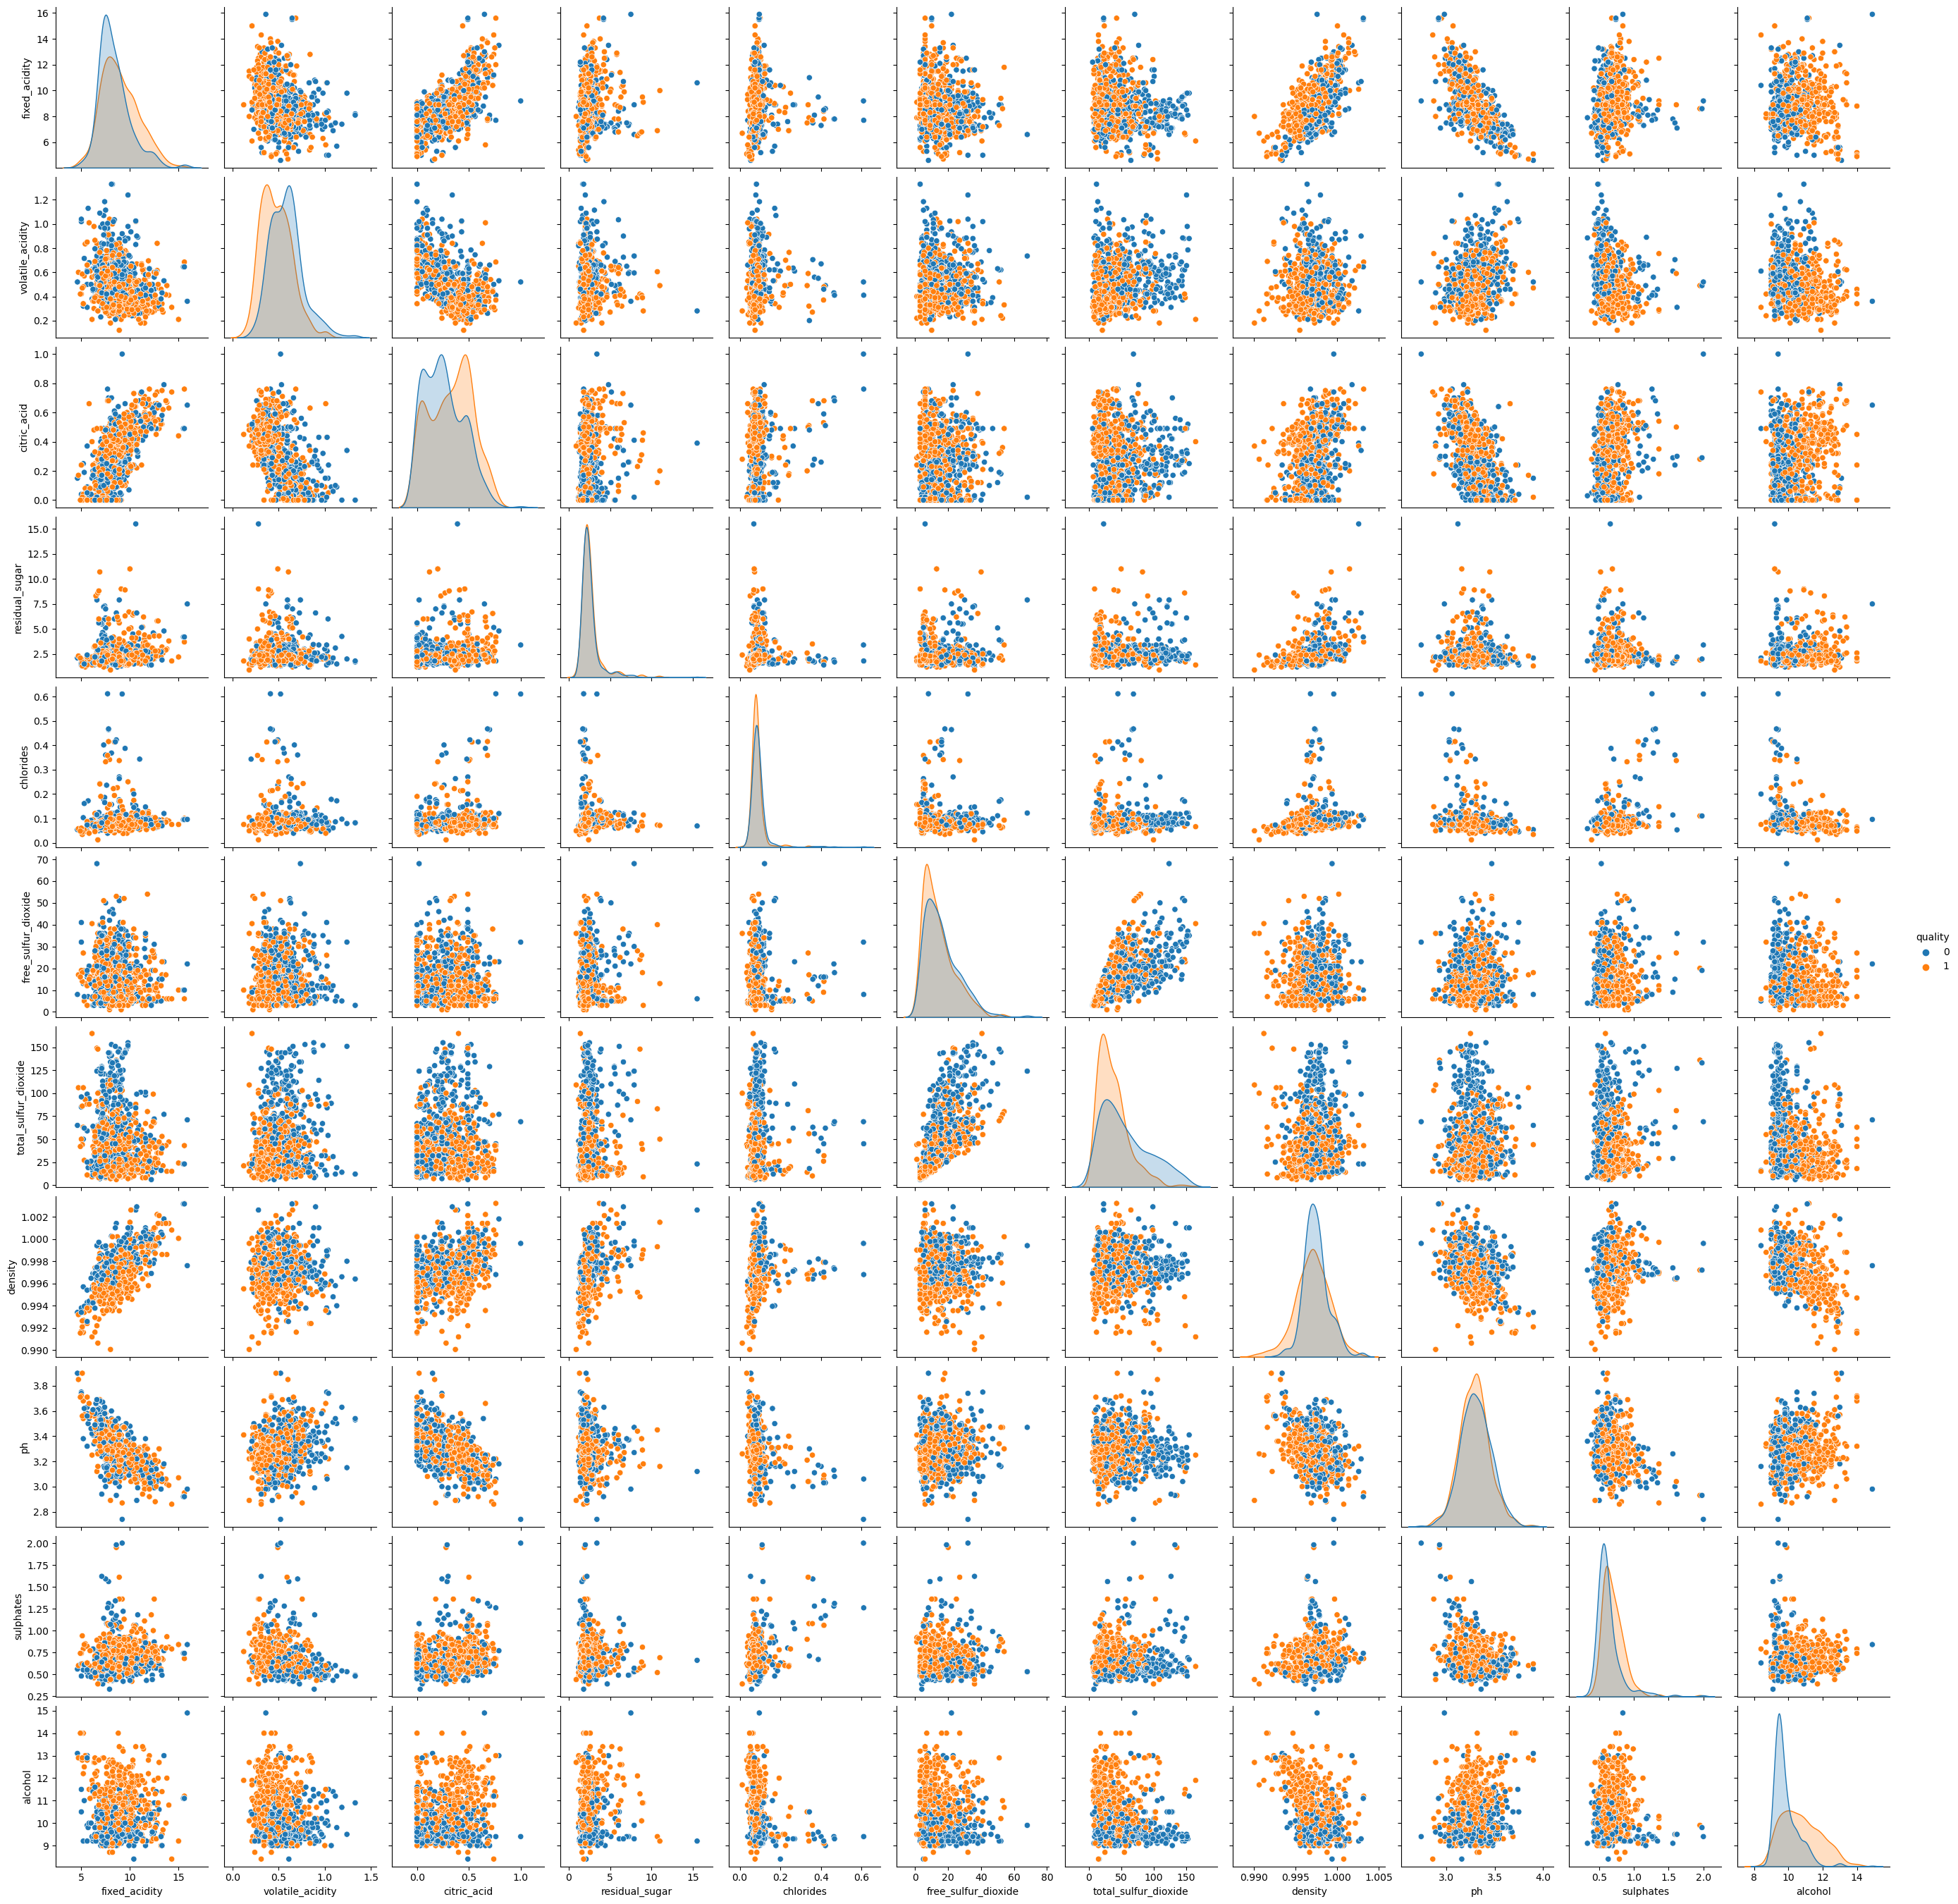

In [18]:
sns.pairplot(train, hue='quality');

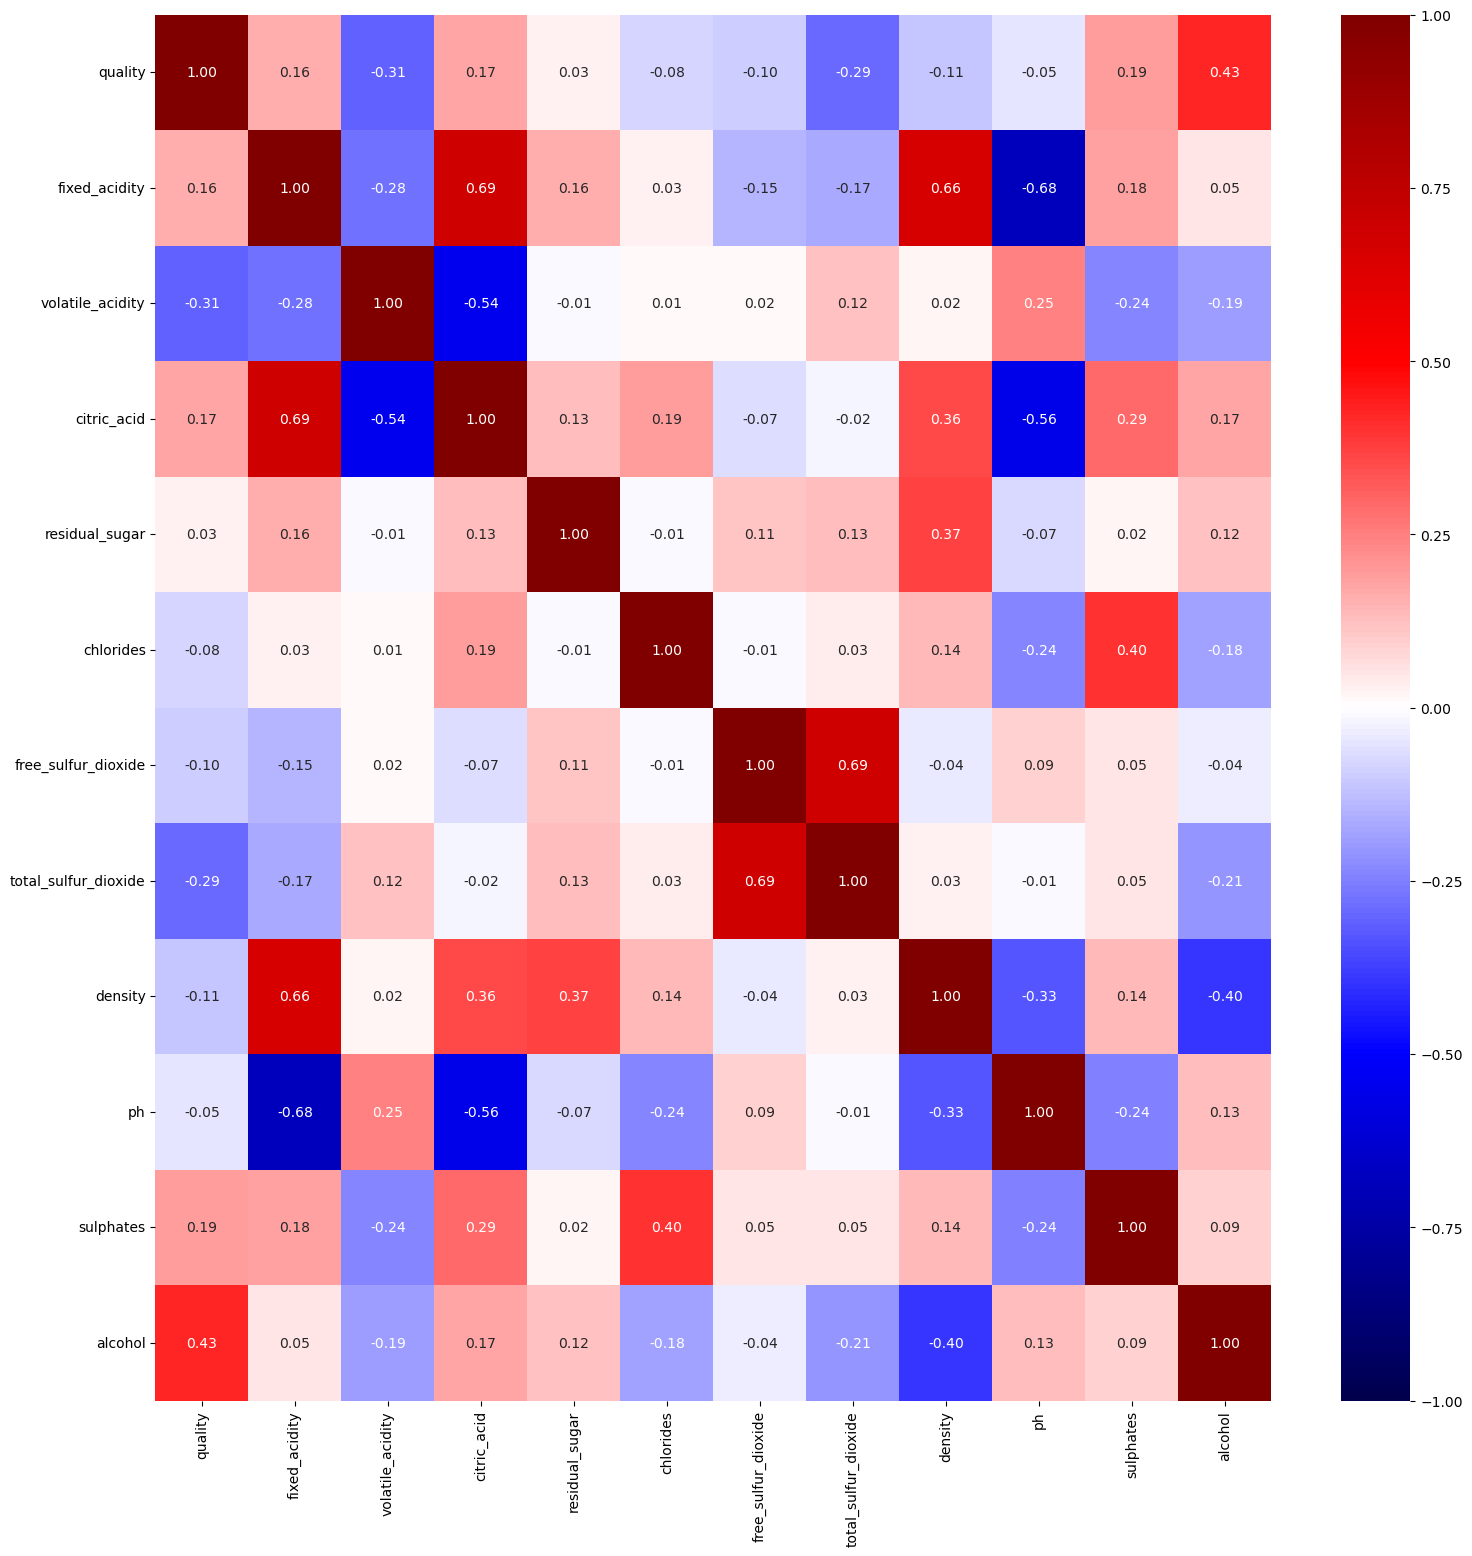

In [19]:
plt.figure(figsize=[18,18])
sns.heatmap(train.corr(), cmap="seismic", annot=True, fmt='.2f', vmin=-1, vmax=1);

In [20]:
def extract_whiskers(data, whisker=1.5):
    median_value = np.median(data)
    upper_quartile = np.percentile(data, 75)
    lower_quartile = np.percentile(data, 25)

    iqr = upper_quartile - lower_quartile
    
    upper_whisker = data[data<=upper_quartile+whisker*iqr].max()
    lower_whisker = data[data>=lower_quartile-whisker*iqr].min()
    
    print("Upper Whisker:", upper_whisker)
    print("Lower Whisker:", lower_whisker)

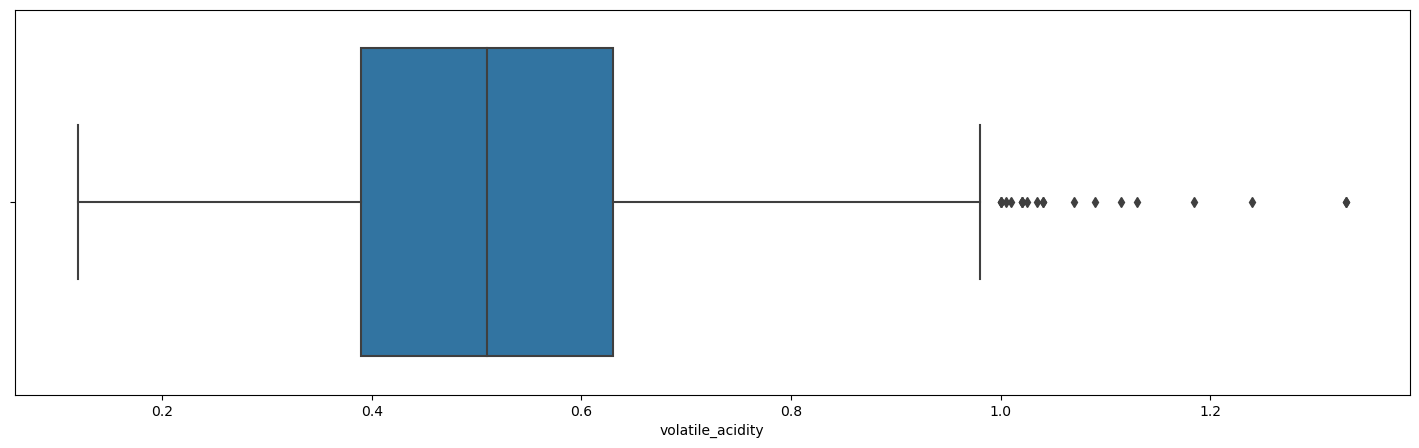

In [21]:
plt.figure(figsize=[18,5])
sns.boxplot(x=train['volatile_acidity'], data=train);

In [22]:
extract_whiskers(train['volatile_acidity'])

Upper Whisker: 0.98
Lower Whisker: 0.12


In [23]:
train = train.loc[train['volatile_acidity'] < 0.98]
train

quality  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0           0            7.4              0.70         0.00             1.9   
1           0            7.8              0.88         0.00             2.6   
2           0            7.8              0.76         0.04             2.3   
3           1           11.2              0.28         0.56             1.9   
4           0            7.4              0.70         0.00             1.9   
...       ...            ...               ...          ...             ...   
1061        1            9.1              0.40         0.50             1.8   
1062        1            8.0              0.38         0.44             1.9   
1063        1           10.2              0.29         0.65             2.4   
1064        1            8.2              0.74         0.09             2.0   
1065        1            7.7              0.61         0.18             2.4   

      chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    ph  \
0         0.076                 11.0                  34.0  0.99780  3.51   
1         0.098                 25.0                  67.0  0.99680  3.20   
2         0.092                 15.0                  54.0  0.99700  3.26   
3         0.075                 17.0                  60.0  0.99800  3.16   
4         0.076                 11.0                  34.0  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
1061      0.071                  7.0                  16.0  0.99462  3.21   
1062      0.098                  6.0                  15.0  0.99560  3.30   
1063      0.075                  6.0                  17.0  0.99565  3.22   
1064      0.067                  5.0                  10.0  0.99418  3.28   
1065      0.083                  6.0                  20.0  0.99630  3.29   

      sulphates  alcohol  
0          0.56      9.4  
1          0.68      9.8  
2          0.65      9.8  
3          0.58      9.8  
4          0.56      9.4  
...         ...      ...  
1061       0.69     12.5  
1062       0.64     11.4  
1063       0.63     11.8  
1064       0.57     11.8  
1065       0.60     10.2  

[1044 rows x 12 columns]

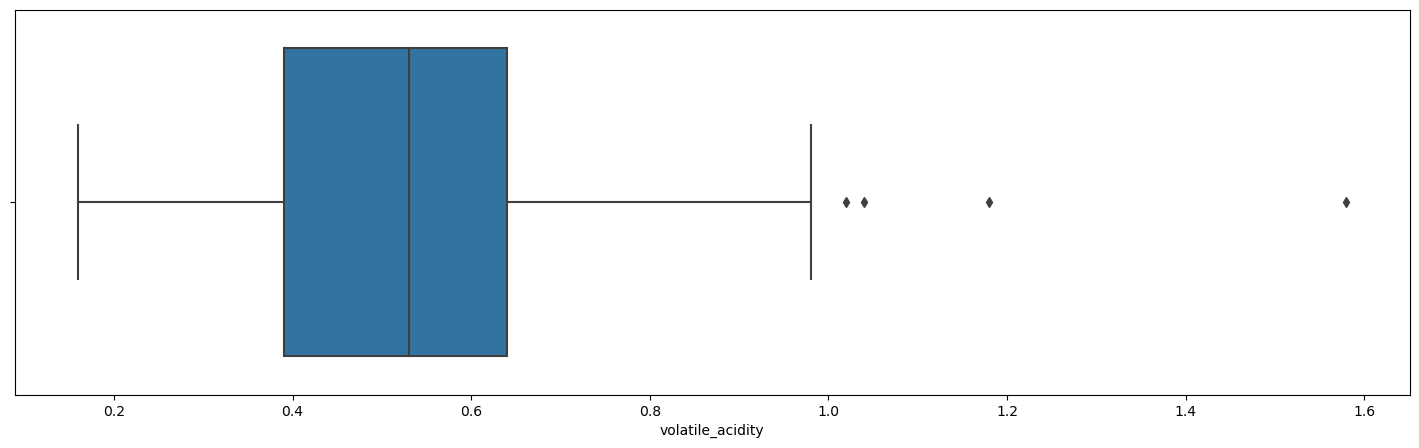

In [24]:
plt.figure(figsize=[18,5])
sns.boxplot(x=test['volatile_acidity'], data=test);

In [25]:
extract_whiskers(test['volatile_acidity'])

Upper Whisker: 0.98
Lower Whisker: 0.16


In [26]:
test = test.loc[test['volatile_acidity'] < 0.98]
test

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0              6.6             0.520         0.08             2.4      0.070   
1             11.1             0.310         0.53             2.2      0.060   
2             11.1             0.310         0.53             2.2      0.060   
3              8.0             0.620         0.35             2.8      0.086   
4              9.3             0.330         0.45             1.5      0.057   
..             ...               ...          ...             ...        ...   
528            6.2             0.600         0.08             2.0      0.090   
529            5.9             0.550         0.10             2.2      0.062   
530            6.3             0.510         0.13             2.3      0.076   
531            5.9             0.645         0.12             2.0      0.075   
532            6.0             0.310         0.47             3.6      0.067   

     free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                   13.0                  26.0  0.99358  3.40       0.72   
1                    3.0                  10.0  0.99572  3.02       0.83   
2                    3.0                  10.0  0.99572  3.02       0.83   
3                   28.0                  52.0  0.99700  3.31       0.62   
4                   19.0                  37.0  0.99498  3.18       0.89   
..                   ...                   ...      ...   ...        ...   
528                 32.0                  44.0  0.99490  3.45       0.58   
529                 39.0                  51.0  0.99512  3.52       0.76   
530                 29.0                  40.0  0.99574  3.42       0.75   
531                 32.0                  44.0  0.99547  3.57       0.71   
532                 18.0                  42.0  0.99549  3.39       0.66   

     alcohol  
0       12.5  
1       10.9  
2       10.9  
3       10.8  
4       11.1  
..       ...  
528     10.5  
529     11.2  
530     11.0  
531     10.2  
532     11.0  

[528 rows x 11 columns]

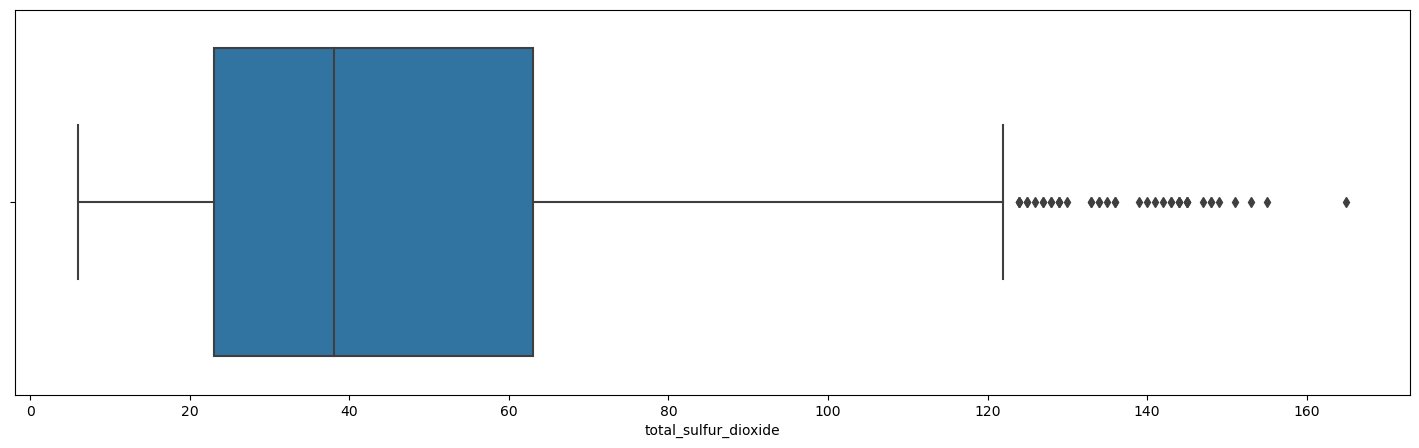

In [27]:
plt.figure(figsize=[18,5])
sns.boxplot(x=train['total_sulfur_dioxide'], data=train);

In [28]:
extract_whiskers(train['total_sulfur_dioxide'])

Upper Whisker: 122.0
Lower Whisker: 6.0


In [29]:
train = train.loc[train['total_sulfur_dioxide'] < 122]
train

quality  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0           0            7.4              0.70         0.00             1.9   
1           0            7.8              0.88         0.00             2.6   
2           0            7.8              0.76         0.04             2.3   
3           1           11.2              0.28         0.56             1.9   
4           0            7.4              0.70         0.00             1.9   
...       ...            ...               ...          ...             ...   
1061        1            9.1              0.40         0.50             1.8   
1062        1            8.0              0.38         0.44             1.9   
1063        1           10.2              0.29         0.65             2.4   
1064        1            8.2              0.74         0.09             2.0   
1065        1            7.7              0.61         0.18             2.4   

      chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    ph  \
0         0.076                 11.0                  34.0  0.99780  3.51   
1         0.098                 25.0                  67.0  0.99680  3.20   
2         0.092                 15.0                  54.0  0.99700  3.26   
3         0.075                 17.0                  60.0  0.99800  3.16   
4         0.076                 11.0                  34.0  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
1061      0.071                  7.0                  16.0  0.99462  3.21   
1062      0.098                  6.0                  15.0  0.99560  3.30   
1063      0.075                  6.0                  17.0  0.99565  3.22   
1064      0.067                  5.0                  10.0  0.99418  3.28   
1065      0.083                  6.0                  20.0  0.99630  3.29   

      sulphates  alcohol  
0          0.56      9.4  
1          0.68      9.8  
2          0.65      9.8  
3          0.58      9.8  
4          0.56      9.4  
...         ...      ...  
1061       0.69     12.5  
1062       0.64     11.4  
1063       0.63     11.8  
1064       0.57     11.8  
1065       0.60     10.2  

[1000 rows x 12 columns]

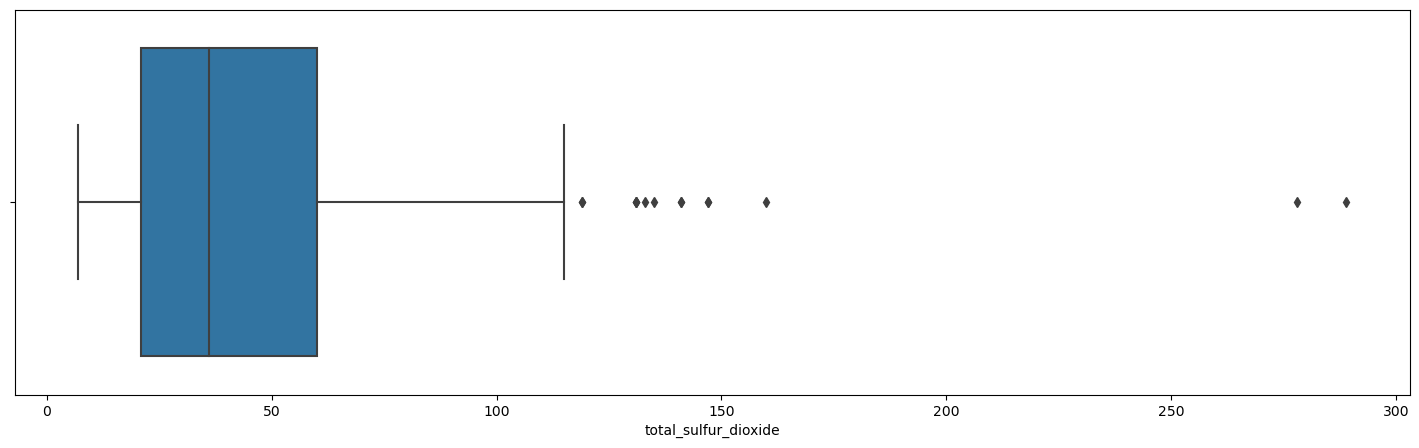

In [30]:
plt.figure(figsize=[18,5])
sns.boxplot(x=test['total_sulfur_dioxide'], data=test);

In [31]:
extract_whiskers(test['total_sulfur_dioxide'])

Upper Whisker: 115.0
Lower Whisker: 7.0


In [32]:
test = test.loc[test['total_sulfur_dioxide'] < 122]
test

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0              6.6             0.520         0.08             2.4      0.070   
1             11.1             0.310         0.53             2.2      0.060   
2             11.1             0.310         0.53             2.2      0.060   
3              8.0             0.620         0.35             2.8      0.086   
4              9.3             0.330         0.45             1.5      0.057   
..             ...               ...          ...             ...        ...   
528            6.2             0.600         0.08             2.0      0.090   
529            5.9             0.550         0.10             2.2      0.062   
530            6.3             0.510         0.13             2.3      0.076   
531            5.9             0.645         0.12             2.0      0.075   
532            6.0             0.310         0.47             3.6      0.067   

     free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                   13.0                  26.0  0.99358  3.40       0.72   
1                    3.0                  10.0  0.99572  3.02       0.83   
2                    3.0                  10.0  0.99572  3.02       0.83   
3                   28.0                  52.0  0.99700  3.31       0.62   
4                   19.0                  37.0  0.99498  3.18       0.89   
..                   ...                   ...      ...   ...        ...   
528                 32.0                  44.0  0.99490  3.45       0.58   
529                 39.0                  51.0  0.99512  3.52       0.76   
530                 29.0                  40.0  0.99574  3.42       0.75   
531                 32.0                  44.0  0.99547  3.57       0.71   
532                 18.0                  42.0  0.99549  3.39       0.66   

     alcohol  
0       12.5  
1       10.9  
2       10.9  
3       10.8  
4       11.1  
..       ...  
528     10.5  
529     11.2  
530     11.0  
531     10.2  
532     11.0  

[516 rows x 11 columns]

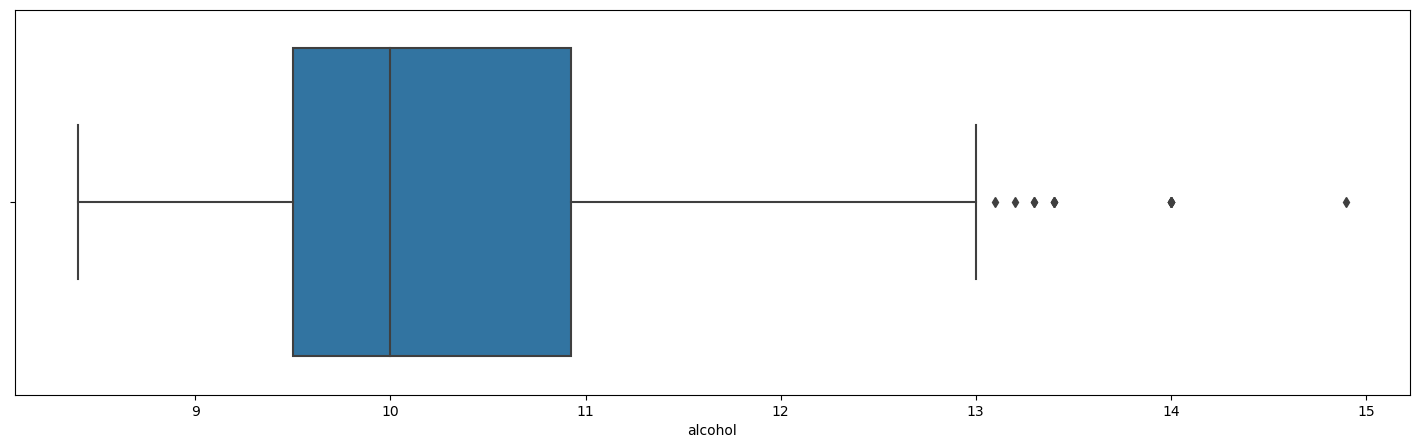

In [33]:
plt.figure(figsize=[18,5])
sns.boxplot(x=train['alcohol'], data=train);

In [34]:
extract_whiskers(train['alcohol'])

Upper Whisker: 13.0
Lower Whisker: 8.4


In [35]:
train = train.loc[train['alcohol'] < 13]
train

quality  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0           0            7.4              0.70         0.00             1.9   
1           0            7.8              0.88         0.00             2.6   
2           0            7.8              0.76         0.04             2.3   
3           1           11.2              0.28         0.56             1.9   
4           0            7.4              0.70         0.00             1.9   
...       ...            ...               ...          ...             ...   
1061        1            9.1              0.40         0.50             1.8   
1062        1            8.0              0.38         0.44             1.9   
1063        1           10.2              0.29         0.65             2.4   
1064        1            8.2              0.74         0.09             2.0   
1065        1            7.7              0.61         0.18             2.4   

      chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    ph  \
0         0.076                 11.0                  34.0  0.99780  3.51   
1         0.098                 25.0                  67.0  0.99680  3.20   
2         0.092                 15.0                  54.0  0.99700  3.26   
3         0.075                 17.0                  60.0  0.99800  3.16   
4         0.076                 11.0                  34.0  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
1061      0.071                  7.0                  16.0  0.99462  3.21   
1062      0.098                  6.0                  15.0  0.99560  3.30   
1063      0.075                  6.0                  17.0  0.99565  3.22   
1064      0.067                  5.0                  10.0  0.99418  3.28   
1065      0.083                  6.0                  20.0  0.99630  3.29   

      sulphates  alcohol  
0          0.56      9.4  
1          0.68      9.8  
2          0.65      9.8  
3          0.58      9.8  
4          0.56      9.4  
...         ...      ...  
1061       0.69     12.5  
1062       0.64     11.4  
1063       0.63     11.8  
1064       0.57     11.8  
1065       0.60     10.2  

[982 rows x 12 columns]

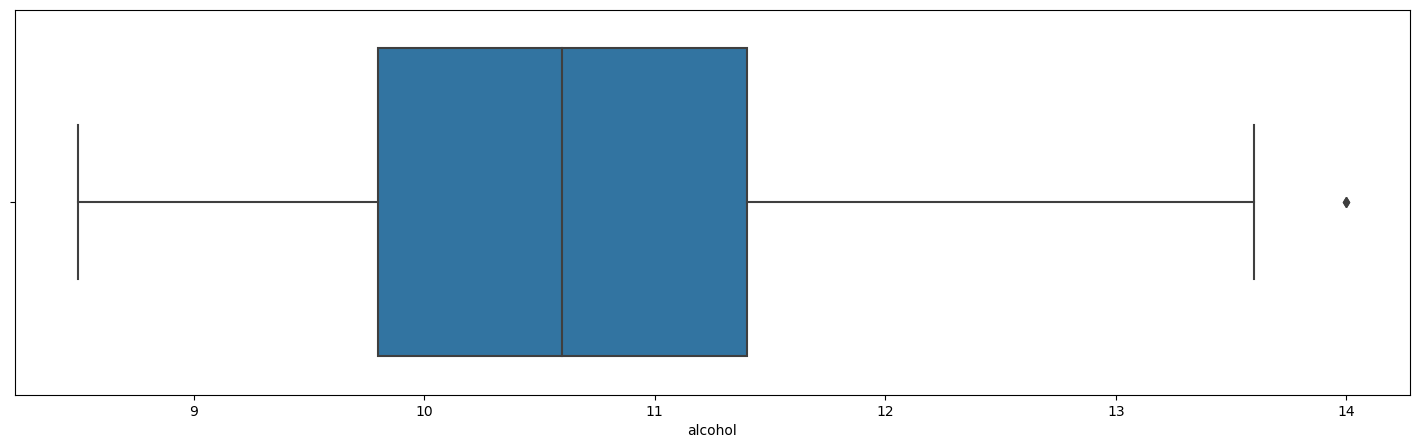

In [36]:
plt.figure(figsize=[18,5])
sns.boxplot(x=test['alcohol'], data=test);

In [37]:
extract_whiskers(test['alcohol'])

Upper Whisker: 13.6
Lower Whisker: 8.5


In [38]:
test = test.loc[test['alcohol'] < 13]
test

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0              6.6             0.520         0.08             2.4      0.070   
1             11.1             0.310         0.53             2.2      0.060   
2             11.1             0.310         0.53             2.2      0.060   
3              8.0             0.620         0.35             2.8      0.086   
4              9.3             0.330         0.45             1.5      0.057   
..             ...               ...          ...             ...        ...   
528            6.2             0.600         0.08             2.0      0.090   
529            5.9             0.550         0.10             2.2      0.062   
530            6.3             0.510         0.13             2.3      0.076   
531            5.9             0.645         0.12             2.0      0.075   
532            6.0             0.310         0.47             3.6      0.067   

     free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                   13.0                  26.0  0.99358  3.40       0.72   
1                    3.0                  10.0  0.99572  3.02       0.83   
2                    3.0                  10.0  0.99572  3.02       0.83   
3                   28.0                  52.0  0.99700  3.31       0.62   
4                   19.0                  37.0  0.99498  3.18       0.89   
..                   ...                   ...      ...   ...        ...   
528                 32.0                  44.0  0.99490  3.45       0.58   
529                 39.0                  51.0  0.99512  3.52       0.76   
530                 29.0                  40.0  0.99574  3.42       0.75   
531                 32.0                  44.0  0.99547  3.57       0.71   
532                 18.0                  42.0  0.99549  3.39       0.66   

     alcohol  
0       12.5  
1       10.9  
2       10.9  
3       10.8  
4       11.1  
..       ...  
528     10.5  
529     11.2  
530     11.0  
531     10.2  
532     11.0  

[505 rows x 11 columns]

In [39]:
train = train.reset_index(drop=True)
train

quality  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0          0            7.4              0.70         0.00             1.9   
1          0            7.8              0.88         0.00             2.6   
2          0            7.8              0.76         0.04             2.3   
3          1           11.2              0.28         0.56             1.9   
4          0            7.4              0.70         0.00             1.9   
..       ...            ...               ...          ...             ...   
977        1            9.1              0.40         0.50             1.8   
978        1            8.0              0.38         0.44             1.9   
979        1           10.2              0.29         0.65             2.4   
980        1            8.2              0.74         0.09             2.0   
981        1            7.7              0.61         0.18             2.4   

     chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    ph  \
0        0.076                 11.0                  34.0  0.99780  3.51   
1        0.098                 25.0                  67.0  0.99680  3.20   
2        0.092                 15.0                  54.0  0.99700  3.26   
3        0.075                 17.0                  60.0  0.99800  3.16   
4        0.076                 11.0                  34.0  0.99780  3.51   
..         ...                  ...                   ...      ...   ...   
977      0.071                  7.0                  16.0  0.99462  3.21   
978      0.098                  6.0                  15.0  0.99560  3.30   
979      0.075                  6.0                  17.0  0.99565  3.22   
980      0.067                  5.0                  10.0  0.99418  3.28   
981      0.083                  6.0                  20.0  0.99630  3.29   

     sulphates  alcohol  
0         0.56      9.4  
1         0.68      9.8  
2         0.65      9.8  
3         0.58      9.8  
4         0.56      9.4  
..         ...      ...  
977       0.69     12.5  
978       0.64     11.4  
979       0.63     11.8  
980       0.57     11.8  
981       0.60     10.2  

[982 rows x 12 columns]

In [40]:
test = test.reset_index(drop=True)
test

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0              6.6             0.520         0.08             2.4      0.070   
1             11.1             0.310         0.53             2.2      0.060   
2             11.1             0.310         0.53             2.2      0.060   
3              8.0             0.620         0.35             2.8      0.086   
4              9.3             0.330         0.45             1.5      0.057   
..             ...               ...          ...             ...        ...   
500            6.2             0.600         0.08             2.0      0.090   
501            5.9             0.550         0.10             2.2      0.062   
502            6.3             0.510         0.13             2.3      0.076   
503            5.9             0.645         0.12             2.0      0.075   
504            6.0             0.310         0.47             3.6      0.067   

     free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                   13.0                  26.0  0.99358  3.40       0.72   
1                    3.0                  10.0  0.99572  3.02       0.83   
2                    3.0                  10.0  0.99572  3.02       0.83   
3                   28.0                  52.0  0.99700  3.31       0.62   
4                   19.0                  37.0  0.99498  3.18       0.89   
..                   ...                   ...      ...   ...        ...   
500                 32.0                  44.0  0.99490  3.45       0.58   
501                 39.0                  51.0  0.99512  3.52       0.76   
502                 29.0                  40.0  0.99574  3.42       0.75   
503                 32.0                  44.0  0.99547  3.57       0.71   
504                 18.0                  42.0  0.99549  3.39       0.66   

     alcohol  
0       12.5  
1       10.9  
2       10.9  
3       10.8  
4       11.1  
..       ...  
500     10.5  
501     11.2  
502     11.0  
503     10.2  
504     11.0  

[505 rows x 11 columns]

# Modelling

In [41]:
x_train, x_test, y_train, y_test = train_test_split(train.iloc[:,1:], train['quality'],
                                                    test_size=0.2, random_state=42)

In [42]:
logreg = LogisticRegression(solver='liblinear')

acc_logreg = cross_val_score(logreg, x_train, y_train, cv=5, scoring='accuracy')
acc_logreg

array([0.77070064, 0.70700637, 0.7388535 , 0.70063694, 0.71974522])

In [43]:
knn = KNeighborsClassifier()

acc_knn = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
acc_knn

array([0.65605096, 0.63057325, 0.62420382, 0.63694268, 0.65605096])

In [44]:
dt = DecisionTreeClassifier() 

acc_dt = cross_val_score(dt, x_train, y_train, cv=5, scoring='accuracy')
acc_dt

array([0.73248408, 0.70063694, 0.68789809, 0.75796178, 0.68152866])

In [45]:
rf = RandomForestClassifier()

acc_rf = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy')
acc_rf

array([0.78980892, 0.79617834, 0.77707006, 0.79617834, 0.76433121])

In [46]:
xgboost = XGBClassifier()

acc_xgboost = cross_val_score(xgboost, x_train, y_train, cv=5, scoring='accuracy')
acc_xgboost

array([0.78980892, 0.77707006, 0.72611465, 0.79617834, 0.76433121])

In [47]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Cross Validated Score (Mean)': [acc_logreg.mean(), acc_knn.mean(),
                                     acc_dt.mean(), acc_rf.mean(), acc_xgboost.mean()],
    'Cross Validated Score (Std)': [acc_logreg.std(), acc_knn.std(),
                                     acc_dt.std(), acc_rf.std(), acc_xgboost.std()]})

result_df = results.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df = result_df.set_index('Model')
result_df['Cross Validated Score (Mean)'] = (result_df['Cross Validated Score (Mean)']*100).round(2)
result_df['Cross Validated Score (Std)'] = (result_df['Cross Validated Score (Std)']*100).round(2)
result_df

Cross Validated Score (Mean)  Cross Validated Score (Std)
Model                                                                         
Random Forest                               78.47                         1.24
XGBoost                                     77.07                         2.48
Logistic Regression                         72.74                         2.53
Decision Tree                               71.21                         2.89
KNN                                         64.08                         1.31

In [48]:
def make_confusion_matrix(model, threshold=0.5):
    y_predict = (model.predict_proba(x_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=100)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Low Quality', 'High Quality'],
           yticklabels=['Low Quality', 'High Quality']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')

In [49]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train, y_train)

logreg.score(x_test, y_test)

0.7157360406091371

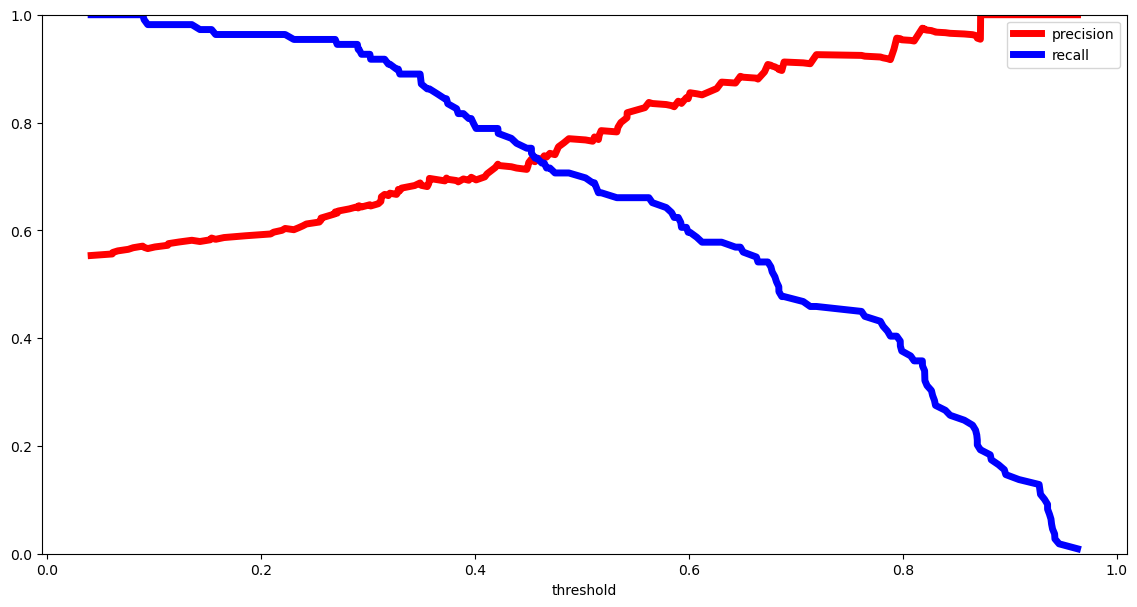

In [50]:
from sklearn.metrics import precision_recall_curve

y_scores = logreg.predict_proba(x_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_test, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=10)
    plt.legend(loc="upper right", fontsize=10)
    plt.ylim([0, 1])

plt.figure(figsize=[14, 7])
plot_precision_and_recall(precision, recall, threshold)

In [51]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(logreg, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [52]:
logreg_threshold = 0.5
y_pred = (logreg.predict_proba(x_test)[:,1] >= logreg_threshold)

logreg_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
logreg_scores.index = ["logreg"]
logreg_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

logreg_scores

Accuracy    Recall  Precision  F1 Score  AUC Score
logreg  0.715736  0.697248   0.767677  0.730769   0.717942

In [53]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

knn.score(x_test, y_test)

0.6649746192893401

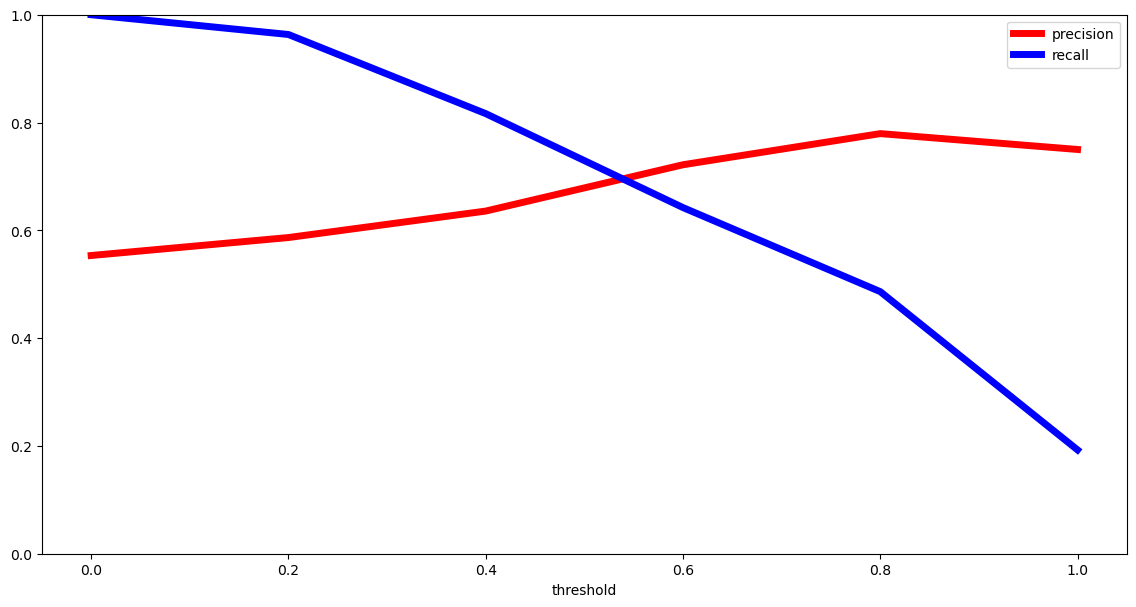

In [54]:
y_scores = knn.predict_proba(x_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=[14, 7])
plot_precision_and_recall(precision, recall, threshold)

In [55]:
interactive(lambda threshold: make_confusion_matrix(knn, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [56]:
knn_threshold = 0.5
y_pred = (knn.predict_proba(x_test)[:,1] >= knn_threshold)

knn_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
knn_scores.index = ["knn"]
knn_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

knn_scores

Accuracy    Recall  Precision  F1 Score  AUC Score
knn  0.664975  0.642202   0.721649  0.679612   0.667692

In [57]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

dt.score(x_test, y_test)

0.7461928934010152

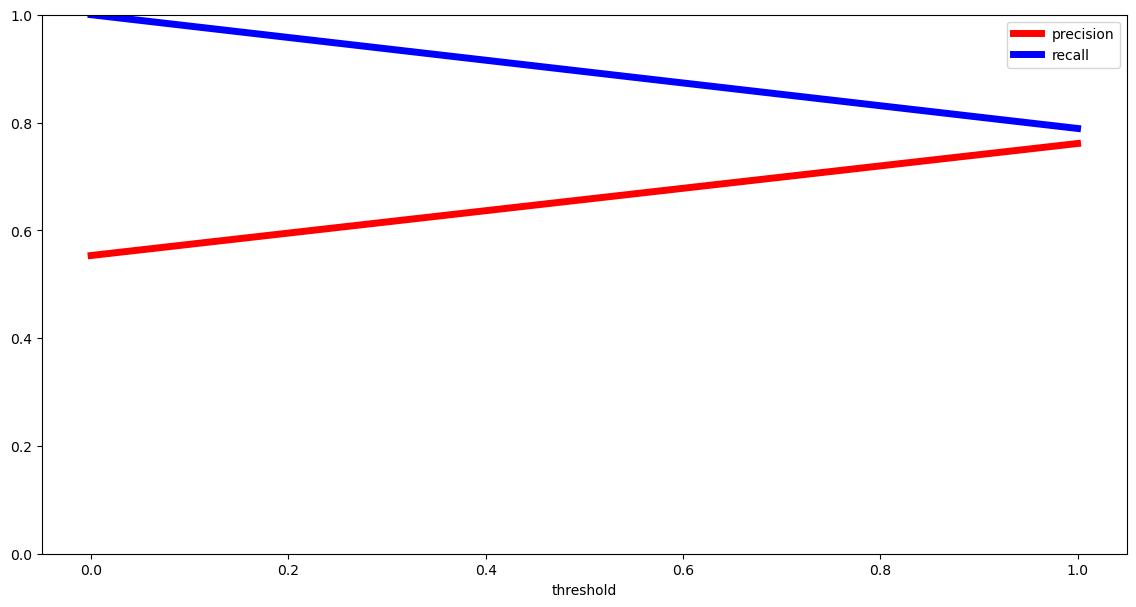

In [58]:
y_scores = dt.predict_proba(x_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=[14, 7])
plot_precision_and_recall(precision, recall, threshold)

In [59]:
interactive(lambda threshold: make_confusion_matrix(dt, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [60]:
dt_threshold = 0.5
y_pred = (dt.predict_proba(x_test)[:,1] >= dt_threshold)

dt_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
dt_scores.index = ["dt"]
dt_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

dt_scores

Accuracy    Recall  Precision  F1 Score  AUC Score
dt  0.746193  0.788991   0.761062  0.774775   0.741086

In [61]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

rf.score(x_test, y_test)

0.8426395939086294

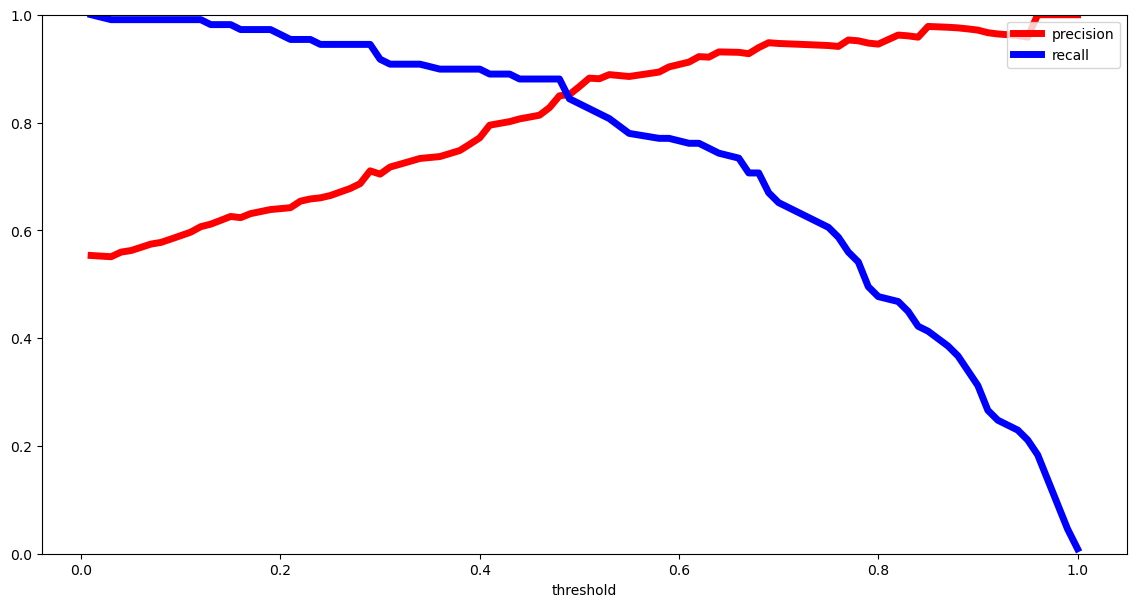

In [62]:
y_scores = rf.predict_proba(x_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=[14, 7])
plot_precision_and_recall(precision, recall, threshold)

In [63]:
interactive(lambda threshold: make_confusion_matrix(rf, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [64]:
rf_threshold = 0.50
y_pred = (rf.predict_proba(x_test)[:,1] >= rf_threshold)

rf_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
rf_scores.index = ["rf"]
rf_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

rf_scores

Accuracy    Recall  Precision  F1 Score  AUC Score
rf  0.837563  0.834862   0.866667  0.850467   0.837886

In [65]:
xgboost = XGBClassifier()
xgboost.fit(x_train, y_train)

xgboost.score(x_test, y_test)

0.7918781725888325

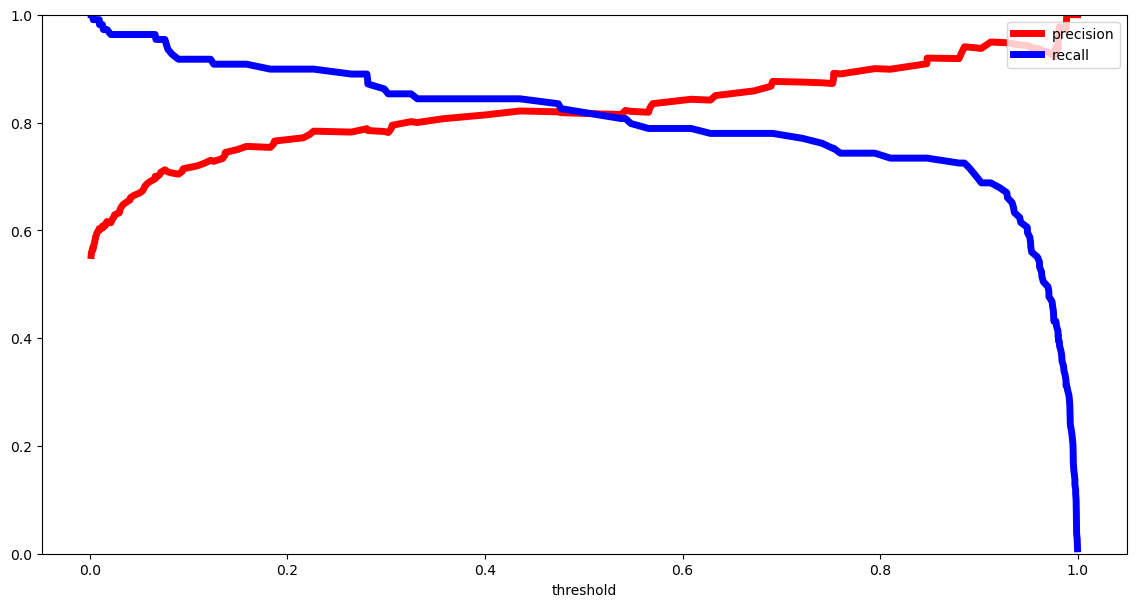

In [66]:
y_scores = xgboost.predict_proba(x_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=[14, 7])
plot_precision_and_recall(precision, recall, threshold)

In [67]:
interactive(lambda threshold: make_confusion_matrix(xgboost, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [68]:
xgboost_threshold = 0.50
y_pred = (xgboost.predict_proba(x_test)[:,1] >= xgboost_threshold)

xgboost_scores = pd.DataFrame([accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),precision_score(y_test, y_pred),
                              f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]).T
xgboost_scores.index = ["xgboost"]
xgboost_scores.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

xgboost_scores

Accuracy    Recall  Precision  F1 Score  AUC Score
xgboost  0.791878  0.807339   0.814815   0.81106   0.790033

# Model Selection

In [69]:
all_scores = pd.concat([logreg_scores, knn_scores, dt_scores, rf_scores, xgboost_scores])
all_scores = all_scores.sort_values(by='F1 Score', ascending=False)
all_scores

Accuracy    Recall  Precision  F1 Score  AUC Score
rf       0.837563  0.834862   0.866667  0.850467   0.837886
xgboost  0.791878  0.807339   0.814815  0.811060   0.790033
dt       0.746193  0.788991   0.761062  0.774775   0.741086
logreg   0.715736  0.697248   0.767677  0.730769   0.717942
knn      0.664975  0.642202   0.721649  0.679612   0.667692

In [70]:
interactive(lambda threshold: make_confusion_matrix(rf, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

# Explainable AI

In [71]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [72]:
shap.initjs()

In [73]:
shap_explainer = shap.Explainer(rf)
shap_values = shap_explainer.shap_values(x_test)

## Global Explainability

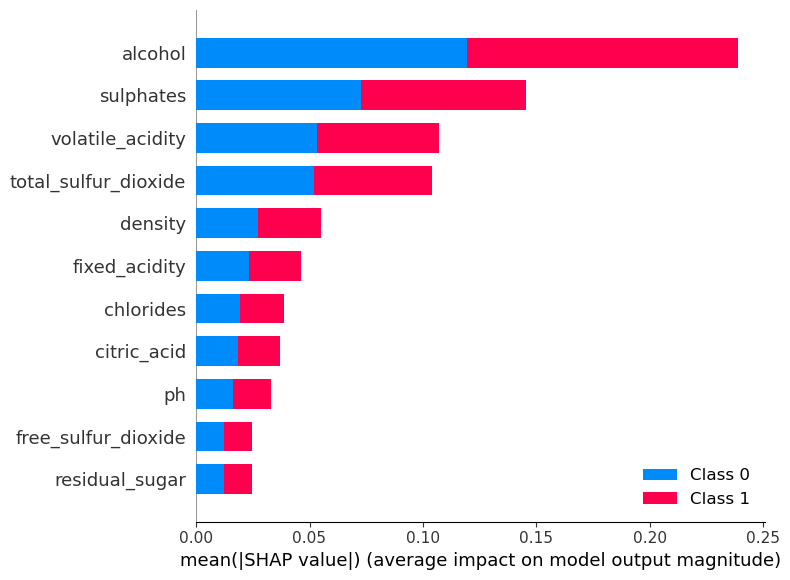

In [74]:
shap.summary_plot(shap_values, x_test)

## Local Explainability

In [75]:
shap.force_plot(shap_explainer.expected_value[1], shap_values[1][0, :], x_test.iloc[0, :])

# Prediction

In [76]:
new_pred = rf.predict(test)

In [77]:
test["Prediction"] = new_pred
test["Prediction"] = test["Prediction"].apply(lambda x: str(x).replace("0","Low Quality"))
test["Prediction"] = test["Prediction"].apply(lambda x: str(x).replace("1","High Quality"))
test

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0              6.6             0.520         0.08             2.4      0.070   
1             11.1             0.310         0.53             2.2      0.060   
2             11.1             0.310         0.53             2.2      0.060   
3              8.0             0.620         0.35             2.8      0.086   
4              9.3             0.330         0.45             1.5      0.057   
..             ...               ...          ...             ...        ...   
500            6.2             0.600         0.08             2.0      0.090   
501            5.9             0.550         0.10             2.2      0.062   
502            6.3             0.510         0.13             2.3      0.076   
503            5.9             0.645         0.12             2.0      0.075   
504            6.0             0.310         0.47             3.6      0.067   

     free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                   13.0                  26.0  0.99358  3.40       0.72   
1                    3.0                  10.0  0.99572  3.02       0.83   
2                    3.0                  10.0  0.99572  3.02       0.83   
3                   28.0                  52.0  0.99700  3.31       0.62   
4                   19.0                  37.0  0.99498  3.18       0.89   
..                   ...                   ...      ...   ...        ...   
500                 32.0                  44.0  0.99490  3.45       0.58   
501                 39.0                  51.0  0.99512  3.52       0.76   
502                 29.0                  40.0  0.99574  3.42       0.75   
503                 32.0                  44.0  0.99547  3.57       0.71   
504                 18.0                  42.0  0.99549  3.39       0.66   

     alcohol    Prediction  
0       12.5  High Quality  
1       10.9  High Quality  
2       10.9  High Quality  
3       10.8  High Quality  
4       11.1  High Quality  
..       ...           ...  
500     10.5  High Quality  
501     11.2  High Quality  
502     11.0  High Quality  
503     10.2  High Quality  
504     11.0  High Quality  

[505 rows x 12 columns]

In [78]:
test.Prediction.value_counts()

High Quality    324
Low Quality     181
Name: Prediction, dtype: int64

In [82]:
from joblib import dump, load

#dump(rf, 'rf_model.pkl')

['rf_model.pkl']

In [83]:
#train.to_csv('red_wine_quality.csv', index=False)

In [84]:
#test.to_csv('red_wine_quality_test.csv', index=False)